# Do a modular approach for writing a custom kNN algorithm (without library function). 
1. feature Scaling
2. Calculate distance (check with every other distance)
3. Finding k-Nearest neighbor
4. Perform majority voting
5. Evaluate model
6. Perform evaluation metric and check the elbow plot (line plot) for every value of k and every value of distance metric
7. Show Voronoi diagram (Purely optional)

#### Standard imports required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import seaborn as sns

In [3]:
# Importing the databaset
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### As all values are numerical, no label encoding required. We will now do a train test split.

In [4]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=0)

#### 1. Feature scaling

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train[0:5], '\n\n', x_test[0:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] 

 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


#### 2. Distance Calculation function

In [6]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

#### 3. Find K nearest neighbors

In [7]:
def find_neighbors(x_train, x_test, k):
    dist = [get_distance(x_test, x) for x in x_train]
    neighbors = np.argsort(dist)[:k]
    return neighbors

#### 4. Perform Majority vote

In [8]:
def majority_voting(neighbors, y_train):
    nearest = [y_train[id] for id in neighbors]
    uniques, counts = np.unique(nearest, return_counts=True)
    return uniques[np.argmax(counts)]

#### 5. Model Evaluation (Accuracy Score)

In [9]:
def evaluate_model(x_train, y_train, x_test, y_test, k):
    y_pred = []
    for test_instance in x_test:
        nearest = find_neighbors(x_train, test_instance, k)
        prediction = majority_voting(nearest, y_train)
        y_pred.append(prediction)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


#### 6. Evaluation with metrics

In [10]:
def metrics_and_plot(x_train, y_train, x_test, y_test, max_k):
    accuracies = []
    
    for k in range(1, max_k + 1):
        accuracy = evaluate_model(x_train, y_train, x_test, y_test, k)
        accuracies.append(accuracy)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), accuracies, marker='o', linestyle='-')
    plt.title(f'KNN Model Evaluation (Distance Metric: Euclidean)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

#### Calling all the functions

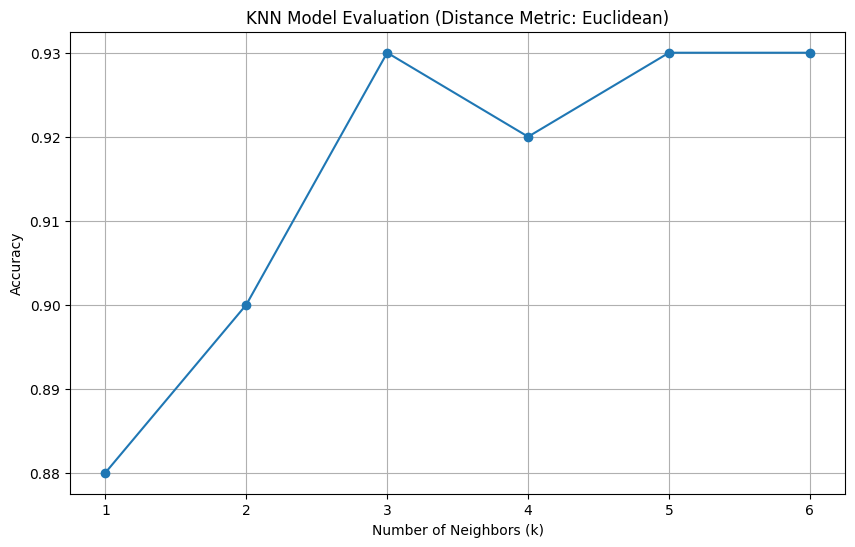

In [12]:
k = 6
metrics_and_plot(x_train, y_train, x_test, y_test, k)